In [1]:
from tensorflow import keras
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

from keras.optimizers import Adam
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from keras.models import Sequential

from keras.layers import Input
from keras.models import Model

from keras.utils import to_categorical

from pandas import get_dummies

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler


In [93]:
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

In [3]:
train_df.head()

,x1,x2,Category
0,3.580873,-0.731839,0
1,9.689688,-2.200641,0
2,-6.791523,-8.922069,0
3,-12.177176,4.259283,0
4,6.264986,-8.106985,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        3000 non-null   float64
 1   x2        3000 non-null   float64
 2   Category  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
train_df.describe()

,x1,x2,Category
count,3000.000000,3000.000000,3000.000000
mean,-0.729951,-0.201301,1.000000
std,7.419549,6.817078,0.816633
min,-14.144046,-12.594757,0.000000
25%,-7.003937,-5.966803,0.000000
50%,-0.749826,-0.093909,1.000000
75%,5.367111,5.637969,2.000000
max,12.600832,13.115078,2.000000


In [6]:
train_df.isnull().sum()

x1          0
x2          0
Category    0
dtype: int64

In [7]:
train_df["Category"].unique()

array([0, 1, 2], dtype=int64)

Notas:

- Hay 1000 datos en cada categoría.
- train_df está balanceado.

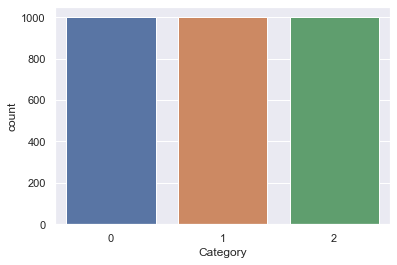

In [8]:
sns.countplot(x='Category', data=train_df)
plt.show()

In [9]:
train_df['Category'].value_counts()

0    1000
2    1000
1    1000
Name: Category, dtype: int64

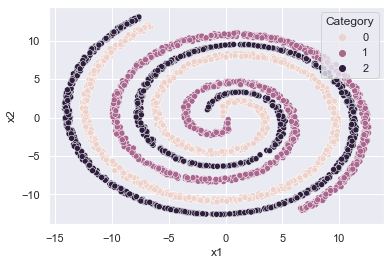

In [4]:
sns.scatterplot(x='x1', y='x2', data=train_df, hue='Category')
plt.show()

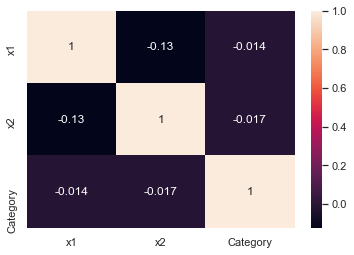

In [11]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

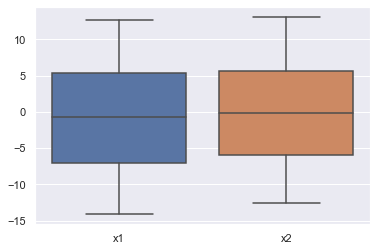

In [12]:
sns.boxplot(data=train_df[['x1', 'x2']])
plt.show()

### test

In [114]:
"""
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Model
from keras.layers import Input, Dense

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Definir la arquitectura de la red neuronal
input_layer = Input(shape=(3,))
dense_1 = Dense(32, activation='tanh')(input_layer)
dense_2 = Dense(16, activation='tanh')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)

# Definir los parámetros a optimizar en la búsqueda
param_grid = {
    'batch_size': [16, 32, 128],
    'epochs': [500, 1000, 1500],
    'optimizer': ['SGD', 'Adam', 'RMSprop']
}

# Crear el objeto de búsqueda GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=1)

# Ejecutar la búsqueda GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train_encoded)

# Imprimir los mejores parámetros encontrados en la búsqueda GridSearchCV
print("Mejores parámetros encontrados:", grid_search.best_params_)
"""

'\n# Importar las bibliotecas necesarias\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom keras.models import Model\nfrom keras.layers import Input, Dense\n\n# Cargar los datos de train y test_x en objetos de DataFrame\ntrain_df = pd.read_csv(\'C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv\')\ntest_df = pd.read_csv(\'C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv\')\n\n# Visualizar las primeras 10 filas del train set\nprint(train_df.head(10))\n\n# Definir una función para convertir x1 y x2 a coordenadas esféricas\ndef to_spherical(x1, x2):\n    r = np.sqrt(x1**2 + x2**2)\n    theta = np.arctan2(x2, x1)\n    phi = np.arccos(x2 / r)\n    return r, theta, phi\n\n# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento\ntrain_df[\'r\'], train_df[\'theta\'], train_df[\'phi\'] = to_spheri

In [2]:
#MODELO QUE FUNCIONA

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Definir la arquitectura de la red neuronal
input_layer = Input(shape=(3,))
dense_1 = Dense(32, activation='tanh')(input_layer)
dense_2 = Dense(16, activation='tanh')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)



# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=100, batch_size=128, validation_data=(X_val, y_val_encoded))

# Predecir los valores del test set
test_X = test_df.drop('Id', axis=1)
test_X['r'], test_X['theta'], test_X['phi'] = to_spherical(test_X['x1'], test_X['x2'])
test_X = test_X.drop(['x1', 'x2'], axis=1)
y_pred = model.predict(test_X)


          x1        x2  Category
0   3.580873 -0.731839         0
1   9.689688 -2.200641         0
2  -6.791523 -8.922069         0
3 -12.177176  4.259283         0
4   6.264986 -8.106985         0
5  -0.612591 -4.583245         0
6  -1.499429 -4.524844         0
7   0.267005  2.107804         0
8  -4.816450 -2.794761         0
9   1.672316  1.903324         0
Epoch 1/100
19/19 [==============================] - 1s 26ms/step - loss: 1.1330 - accuracy: 0.3300 - val_loss: 1.1157 - val_accuracy: 0.3033
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 1.1037 - accuracy: 0.3404 - val_loss: 1.1093 - val_accuracy: 0.3233
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 1.0982 - accuracy: 0.3929 - val_loss: 1.1042 - val_accuracy: 0.3233
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0950 - accuracy: 0.3679 - val_loss: 1.0999 - val_accuracy: 0.3400
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss:

19/19 [==============================] - 0s 6ms/step - loss: 1.0643 - accuracy: 0.3992 - val_loss: 1.0610 - val_accuracy: 0.4033
Epoch 57/100
19/19 [==============================] - 0s 6ms/step - loss: 1.0638 - accuracy: 0.4033 - val_loss: 1.0610 - val_accuracy: 0.3833
Epoch 58/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0630 - accuracy: 0.4067 - val_loss: 1.0619 - val_accuracy: 0.3850
Epoch 59/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0633 - accuracy: 0.4004 - val_loss: 1.0610 - val_accuracy: 0.3800
Epoch 60/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0627 - accuracy: 0.4025 - val_loss: 1.0631 - val_accuracy: 0.3900
Epoch 61/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0625 - accuracy: 0.4175 - val_loss: 1.0620 - val_accuracy: 0.3883
Epoch 62/100
19/19 [==============================] - 0s 5ms/step - loss: 1.0620 - accuracy: 0.4058 - val_loss: 1.0609 - val_accuracy: 0.3933
Epoch 63/100
19/19 

In [119]:
# Obtener la clase con mayor probabilidad como la predicción final
y_pred_max = y_pred.argmax(axis=-1)
np.set_printoptions(threshold=np.inf)
print(y_pred_max)

[0 1 2 1 0 0 1 2 1 0 1 1 1 0 0 0 2 0 1 2 0 1 1 2 1 0 1 0 0 2 2 0 2 0 0 0 2
 2 2 2 1 1 1 2 0 0 2 2 1 2 2 0 0 1 2 2 2 2 1 0 0 1 0 2 1 2 1 0 0 0 1 1 0 1
 2 1 0 0 0 2 1 0 0 1 2 0 2 2 2 0 1 2 2 1 1 0 2 2 0 1 1 1 1 0 2 1 1 2 2 2 1
 2 1 1 2 1 2 0 0 1 2 2 2 2 0 0 1 2 1 1 0 1 1 1 2 2 1 0 1 1 2 1 0 2 2 1 2 0
 0 1 2 0 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 0 2 0 1 2 0 1 2 0 1 1 1 0 2 1 0 1 0
 1 0 2 2 1 0 1 0 0 1 1 0 0 0 2 1 0 2 0 0 2 0 0 2 0 0 0 2 1 0 0 2 0 0 0 1 1
 1 1 2 2 2 1 2 1 1 2 1 0 2 2 0 0 0 0 2 1 2 0 2 2 2 0 0 2 1 0 2 2 1 2 0 2 0
 1 2 2 0 0 2 2 2 1 1 2 0 1 1 2 1 1 1 0 0 0 2 1 2 2 0 2 0 1 1 2 0 1 1 1 1 0
 1 0 1 2 0 1 2 0 0 2 0 2 1 1 0 2 2 1 1 2 0 0 2 0 0 0 1 0 2 1 2 2 2 1 1 2 0
 2 0 2 0 2 2 1 0 2 1 1 1 1 0 2 0 1 2 1 1 1 2 0 0 2 0 0 0 1 0 2 0 1 1 0 1 2
 2 1 1 2 1 1 0 1 1 1 0 1 1 0 2 2 0 0 2 1 2 0 0 1 0 1 2 1 1 1 2 2 2 1 0 1 2
 2 1 1 1 0 2 0 1 1 2 0 2 0 2 0 2 1 1 1 1 0 1 2 1 1 2 2 0 0 1 1 0 0 0 1 0 2
 0 0 2 0 1 0 2 2 2 0 2 1 1 1 1 2 1 1 1 0 1 2 1 2 1 1 2 1 1 0 1 1 0 2 0 1 2
 1 2 2 1 0 0 2 2 1 2 2 2 

In [120]:
#Guardo los resultados en un archivo CSV
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': y_pred_max})
submission_df.to_csv('submission_5.csv', index=False)

## Prueba 2:

In [167]:
#correrlo mañanaaa
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Model
from keras.layers import Input, Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Definir la arquitectura de la red neuronal
def create_model(loss='categorical_crossentropy', optimizer='SGD'):
    input_layer = Input(shape=(3,))
    dense_1 = Dense(100, activation='tanh')(input_layer)
    dense_2 = Dense(50, activation='tanh')(dense_1)
    output_layer = Dense(3, activation='softmax')(dense_2)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Compilar el modelo con los hiperparámetros proporcionados
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

# Crear el modelo de KerasClassifier para su uso con GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=512, verbose=0)

# Definir los hiperparámetros y valores a ser probados
param_grid = {
    'loss': ['categorical_crossentropy', 'mse'],
    'optimizer': ['SGD', 'Adam']
}

# Realizar GridSearchCV con los hiperparámetros proporcionados
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)

grid_search_result = grid_search.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), verbose=0)

print("Mejor combinación de hiperparámetros encontrada:", grid_search_result.best_params_)
print("Precisión media:", grid_search_result.best_score_)




          x1        x2  Category
0   3.580873 -0.731839         0
1   9.689688 -2.200641         0
2  -6.791523 -8.922069         0
3 -12.177176  4.259283         0
4   6.264986 -8.106985         0
5  -0.612591 -4.583245         0
6  -1.499429 -4.524844         0
7   0.267005  2.107804         0
8  -4.816450 -2.794761         0
9   1.672316  1.903324         0
Fitting 3 folds for each of 4 candidates, totalling 12 fits


<ipython-input-167-e5411b10cd78>:50: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=512, verbose=0)


Mejor combinación de hiperparámetros encontrada: {'loss': 'categorical_crossentropy', 'optimizer': 'Adam'}
Precisión media: 0.3870833218097687


### Prueba 3:

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
#print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Definir la arquitectura de la red neuronal
input_layer = Input(shape=(3,))
dense_1 = Dense(150, activation='tanh')(input_layer)
dense_2 = Dense(50, activation='tanh')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)

#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.01)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=80, batch_size=512, validation_data=(X_val, y_val_encoded))

# Predecir los valores del test set
test_X = test_df.drop('Id', axis=1)
test_X['r'], test_X['theta'], test_X['phi'] = to_spherical(test_X['x1'], test_X['x2'])
test_X = test_X.drop(['x1', 'x2'], axis=1)
y_pred = model.predict(test_X)

Epoch 1/80


C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 1s 93ms/step - loss: 1.9228 - accuracy: 0.3237 - val_loss: 1.1492 - val_accuracy: 0.3467
Epoch 2/80
5/5 [==============================] - 0s 21ms/step - loss: 1.1921 - accuracy: 0.3421 - val_loss: 1.0904 - val_accuracy: 0.3983
Epoch 3/80
5/5 [==============================] - 0s 16ms/step - loss: 1.0906 - accuracy: 0.3592 - val_loss: 1.0990 - val_accuracy: 0.3633
Epoch 4/80
5/5 [==============================] - 0s 18ms/step - loss: 1.0889 - accuracy: 0.3725 - val_loss: 1.0752 - val_accuracy: 0.3050
Epoch 5/80
5/5 [==============================] - 0s 19ms/step - loss: 1.0776 - accuracy: 0.3858 - val_loss: 1.0695 - val_accuracy: 0.4367
Epoch 6/80
5/5 [==============================] - 0s 21ms/step - loss: 1.0774 - accuracy: 0.3929 - val_loss: 1.0701 - val_accuracy: 0.3817
Epoch 7/80
5/5 [==============================] - 0s 17ms/step - loss: 1.0732 - accuracy: 0.3758 - val_loss: 1.0771 - val_accuracy: 0.3700
Epoch 8/80
5/5 [======================

Epoch 60/80
5/5 [==============================] - 0s 15ms/step - loss: 0.3352 - accuracy: 0.9042 - val_loss: 0.3366 - val_accuracy: 0.9017
Epoch 61/80
5/5 [==============================] - 0s 18ms/step - loss: 0.3234 - accuracy: 0.9017 - val_loss: 0.3541 - val_accuracy: 0.8983
Epoch 62/80
5/5 [==============================] - 0s 16ms/step - loss: 0.3168 - accuracy: 0.8992 - val_loss: 0.3339 - val_accuracy: 0.8967
Epoch 63/80
5/5 [==============================] - 0s 17ms/step - loss: 0.3087 - accuracy: 0.9004 - val_loss: 0.3231 - val_accuracy: 0.8950
Epoch 64/80
5/5 [==============================] - 0s 17ms/step - loss: 0.2904 - accuracy: 0.9200 - val_loss: 0.3029 - val_accuracy: 0.9033
Epoch 65/80
5/5 [==============================] - 0s 22ms/step - loss: 0.2774 - accuracy: 0.9121 - val_loss: 0.2826 - val_accuracy: 0.9050
Epoch 66/80
5/5 [==============================] - 0s 24ms/step - loss: 0.2596 - accuracy: 0.9208 - val_loss: 0.2770 - val_accuracy: 0.9033
Epoch 67/80
5/5 [===

In [4]:
# Obtener la clase con mayor probabilidad como la predicción final
y_pred_max = y_pred.argmax(axis=-1)
np.set_printoptions(threshold=np.inf)
print(y_pred_max)

[0 1 2 1 0 0 1 2 1 0 1 1 1 0 0 0 2 2 1 2 0 1 1 2 1 0 1 0 0 2 2 0 2 0 0 0 2
 2 2 2 1 1 1 2 0 0 2 2 1 2 2 0 2 1 2 2 2 2 1 0 0 1 0 2 1 2 1 0 0 0 1 1 0 1
 2 1 0 0 0 2 1 0 0 1 1 0 2 2 2 0 1 2 2 1 1 0 2 2 0 1 1 1 1 0 2 1 1 2 2 2 1
 2 1 1 2 1 2 0 0 1 2 2 2 2 0 0 1 2 1 1 0 1 1 1 2 2 1 0 1 1 2 1 0 2 2 1 2 0
 0 1 2 0 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 0 2 0 1 2 0 1 2 0 1 1 1 0 2 1 0 1 2
 1 0 2 2 1 0 1 0 0 1 1 0 0 0 2 1 0 2 0 0 2 0 0 2 0 0 0 2 1 2 0 2 0 0 0 1 1
 1 1 2 2 2 1 2 1 1 1 1 2 2 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 1 0 2 2 2 2 0 2 0
 1 1 2 0 0 2 2 2 1 1 2 0 1 1 1 1 1 1 0 0 0 2 1 2 2 0 2 0 1 1 2 0 1 1 1 1 0
 1 2 1 2 0 1 2 0 0 2 0 2 1 1 0 2 2 1 1 2 0 0 2 0 0 0 1 0 2 1 2 2 2 1 1 2 0
 2 0 2 0 2 2 1 0 2 1 1 1 1 0 2 0 1 0 1 1 1 2 0 0 2 0 2 2 1 0 2 0 1 1 0 1 2
 2 1 1 2 1 1 0 1 1 1 0 1 1 0 2 2 0 0 2 1 2 0 0 1 0 1 2 1 1 1 2 2 0 1 0 1 2
 2 1 1 1 0 2 0 1 1 2 0 2 0 2 0 2 1 1 1 1 0 1 2 1 1 2 2 0 0 1 1 0 0 0 1 0 2
 0 0 2 0 1 0 2 0 2 0 2 1 1 1 1 2 1 1 1 0 1 2 1 2 1 1 2 1 1 0 1 1 0 2 0 1 2
 1 2 2 1 0 0 2 2 1 2 2 2 

In [5]:
#Guardo los resultados en un archivo CSV
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': y_pred_max})
submission_df.to_csv('submission_14_day2.csv', index=False)

In [170]:
##CV para neuronas y activation function

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Model
from keras.layers import Input, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
#print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']

# One-hot encoding para las etiquetas
y_encoded = pd.get_dummies(y)

# Definir la función que crea el modelo
def create_model(neurons=100, activation='tanh'):
    input_layer = Input(shape=(3,))
    dense_1 = Dense(neurons, activation=activation)(input_layer)
    dense_2 = Dense(neurons // 2, activation=activation)(dense_1)
    output_layer = Dense(3, activation='softmax')(dense_2)
    model = Model(inputs=input_layer, outputs=output_layer)
    optimizer = Adam(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Crear el modelo de Keras para usar con GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=512, verbose=0)

# Definir los parámetros para grid search
neurons = [50, 100, 150]
activation = ['relu', 'tanh', 'sigmoid']
param_grid = dict(neurons=neurons, activation=activation)

# Ejecutar grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X, y_encoded)

# Imprimir los resultados
print("Mejor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Entrenar el modelo con los mejores parámetros encontrados
#best_params = grid_result.best_params_


<ipython-input-170-36bf9b703345>:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=80, batch_size=512, verbose=0)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-pack

Mejor: 0.020333 usando {'activation': 'tanh', 'neurons': 150}
0.000000 (0.000000) with: {'activation': 'relu', 'neurons': 50}
0.000000 (0.000000) with: {'activation': 'relu', 'neurons': 100}
0.000000 (0.000000) with: {'activation': 'relu', 'neurons': 150}
0.000000 (0.000000) with: {'activation': 'tanh', 'neurons': 50}
0.003000 (0.003559) with: {'activation': 'tanh', 'neurons': 100}
0.020333 (0.028756) with: {'activation': 'tanh', 'neurons': 150}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'neurons': 50}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'neurons': 100}
0.000000 (0.000000) with: {'activation': 'sigmoid', 'neurons': 150}


In [172]:
##otro cv para activation y neurons:

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasClassifier

# Definir una función para crear el modelo
def create_model(neurons=32, activation='relu', optimizer='adam'):
    input_layer = Input(shape=(3,))
    dense_1 = Dense(neurons, activation=activation)(input_layer)
    dense_2 = Dense(neurons//2, activation=activation)(dense_1)
    output_layer = Dense(3, activation='softmax')(dense_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Crear un clasificador Keras
model = KerasClassifier(build_fn=create_model)

# Definir los parámetros que se probarán en la búsqueda de hiperparámetros
neurons = [64, 100, 150]
activations = ['relu', 'tanh', 'sigmoid']
optimizers = [SGD(lr=0.1), Adam(lr=0.01)]

# Definir un diccionario de parámetros
param_grid = dict(neurons=neurons, activation=activations, optimizer=optimizers)

# Realizar la búsqueda de hiperparámetros
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train_encoded)

# Imprimir los resultados
print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params


<ipython-input-172-fcc87f9c44e8>:47: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Javiera\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 0s 4ms/step - loss: 1.1003 - accuracy: 0.3487


75/75 [==============================] - 1s 3ms/step - loss: 1.1280 - accuracy: 0.3621
Mejor: 0.3874999980131785 usando {'activation': 'relu', 'neurons': 100, 'optimizer': <keras.optimizers.legacy.gradient_descent.SGD object at 0x0000016ADA18DDC0>}


[{'activation': 'relu', 'neurons': 50},
 {'activation': 'relu', 'neurons': 100},
 {'activation': 'relu', 'neurons': 150},
 {'activation': 'tanh', 'neurons': 50},
 {'activation': 'tanh', 'neurons': 100},
 {'activation': 'tanh', 'neurons': 150},
 {'activation': 'sigmoid', 'neurons': 50},
 {'activation': 'sigmoid', 'neurons': 100},
 {'activation': 'sigmoid', 'neurons': 150}]

### FIN

In [125]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)

# Definir los parámetros a optimizar en la búsqueda
param_grid = {
    'batch_size': [16, 32, 128],
    'epochs': [500, 1000, 1500],
    'optimizer': ['SGD', 'Adam', 'RMSprop']
}

# Crear el objeto de búsqueda GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=1)

# Ejecutar la búsqueda GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train_encoded)

# Imprimir los mejores parámetros encontrados en la búsqueda GridSearchCV
print("Mejores parámetros encontrados:", grid_search.best_params_)


          x1        x2  Category
0   3.580873 -0.731839         0
1   9.689688 -2.200641         0
2  -6.791523 -8.922069         0
3 -12.177176  4.259283         0
4   6.264986 -8.106985         0
5  -0.612591 -4.583245         0
6  -1.499429 -4.524844         0
7   0.267005  2.107804         0
8  -4.816450 -2.794761         0
9   1.672316  1.903324         0


<ipython-input-125-3b2a4e839ce1>:35: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=1)


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.functional.Functional object at 0x0000016ADD84E340> does not.

### FIN PRUEBA

In [94]:
X = train_df.drop('Category', axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
#One-hot encoding en las etiquetas
#y_train_encoded = to_categorical(y_train)
#y_val_encoded = to_categorical(y_val)

y_train_encoded = get_dummies(y_train)
y_val_encoded = get_dummies(y_val)

In [85]:
"""## Normalizar los datos de entrada
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_norm = (X_train - mean) / std
X_val_norm = (X_val - mean) / std
test_X_norm = (test_df.drop('Id', axis=1) - mean) / std
"""

"## Normalizar los datos de entrada\nmean = X_train.mean(axis=0)\nstd = X_train.std(axis=0)\nX_train_norm = (X_train - mean) / std\nX_val_norm = (X_val - mean) / std\ntest_X_norm = (test_df.drop('Id', axis=1) - mean) / std\n"

In [20]:
"""
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)"""

'\nscaler = MinMaxScaler()\nX_train_norm = scaler.fit_transform(X_train)\nX_val_norm = scaler.transform(X_val)'

In [40]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization

In [92]:
"""
# Definir los valores de los hiperparámetros a evaluar
param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (32, 16), (64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
}

# Definir el modelo
model = MLPClassifier(max_iter=1000)

# Realizar la validación cruzada con k=5
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Buscar los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train_encoded)

# Mostrar los resultados
print("Mejores hiperparámetros: ", grid_result.best_params_)
print("Mejor precisión: ", grid_result.best_score_)

# Definir la arquitectura de la red neuronal con los mejores hiperparámetros
best_hidden_layer_sizes = grid_result.best_params_['hidden_layer_sizes']
best_activation = grid_result.best_params_['activation']
best_alpha = grid_result.best_params_['alpha']
"""

'\n# Definir los valores de los hiperparámetros a evaluar\nparam_grid = {\n    \'hidden_layer_sizes\': [(32,), (64,), (32, 16), (64, 32)],\n    \'activation\': [\'relu\', \'tanh\', \'logistic\'],\n    \'alpha\': [0.0001, 0.001, 0.01, 0.1],\n}\n\n# Definir el modelo\nmodel = MLPClassifier(max_iter=1000)\n\n# Realizar la validación cruzada con k=5\ncv = KFold(n_splits=5, shuffle=True, random_state=42)\n\n# Buscar los mejores hiperparámetros\ngrid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1)\ngrid_result = grid_search.fit(X_train, y_train_encoded)\n\n# Mostrar los resultados\nprint("Mejores hiperparámetros: ", grid_result.best_params_)\nprint("Mejor precisión: ", grid_result.best_score_)\n\n# Definir la arquitectura de la red neuronal con los mejores hiperparámetros\nbest_hidden_layer_sizes = grid_result.best_params_[\'hidden_layer_sizes\']\nbest_activation = grid_result.best_params_[\'activation\']\nbest_alpha = grid_result.best_params_[\'alpha\']\n'

In [106]:
"""# Definir la arquitectura de la red neuronal
input_layer = Input(shape=(X_train.shape[1],))
dense_1 = Dense(64, activation='relu')(input_layer)
batch_norm_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.5)(batch_norm_1)
dense_2 = Dense(32, activation='relu')(dropout_1)
batch_norm_2 = BatchNormalization()(dense_2)
dropout_2 = Dropout(0.5)(batch_norm_2)
output_layer = Dense(y_train_encoded.shape[1], activation='softmax')(dropout_2)
"""

"# Definir la arquitectura de la red neuronal\ninput_layer = Input(shape=(X_train.shape[1],))\ndense_1 = Dense(64, activation='relu')(input_layer)\nbatch_norm_1 = BatchNormalization()(dense_1)\ndropout_1 = Dropout(0.5)(batch_norm_1)\ndense_2 = Dense(32, activation='relu')(dropout_1)\nbatch_norm_2 = BatchNormalization()(dense_2)\ndropout_2 = Dropout(0.5)(batch_norm_2)\noutput_layer = Dense(y_train_encoded.shape[1], activation='softmax')(dropout_2)\n"

In [89]:
#Definiendo la estructura de la red neuronal
input_layer = Input(shape=(2,))
dense_1 = Dense(32, activation='sigmoid')(input_layer)
dense_2 = Dense(16, activation='sigmoid')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)



In [90]:
#Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [91]:
# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=500, batch_size=64, validation_data=(X_val, y_val_encoded))

Epoch 1/500
19/19 [==============================] - 2s 26ms/step - loss: 1.1586 - accuracy: 0.3262 - val_loss: 1.0976 - val_accuracy: 0.3617
Epoch 2/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0873 - accuracy: 0.3704 - val_loss: 1.0852 - val_accuracy: 0.3683
Epoch 3/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0778 - accuracy: 0.4125 - val_loss: 1.0843 - val_accuracy: 0.3933
Epoch 4/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0733 - accuracy: 0.4104 - val_loss: 1.0792 - val_accuracy: 0.3917
Epoch 5/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0710 - accuracy: 0.4079 - val_loss: 1.0764 - val_accuracy: 0.3917
Epoch 6/500
19/19 [==============================] - 0s 10ms/step - loss: 1.0695 - accuracy: 0.4067 - val_loss: 1.0758 - val_accuracy: 0.3900
Epoch 7/500
19/19 [==============================] - 0s 8ms/step - loss: 1.0683 - accuracy: 0.4079 - val_loss: 1.0744 - val_accuracy: 0.3900
Epoch 8/500

19/19 [==============================] - 0s 10ms/step - loss: 1.0491 - accuracy: 0.4325 - val_loss: 1.0598 - val_accuracy: 0.4250
Epoch 59/500
19/19 [==============================] - 0s 10ms/step - loss: 1.0491 - accuracy: 0.4358 - val_loss: 1.0600 - val_accuracy: 0.4450
Epoch 60/500
19/19 [==============================] - 0s 10ms/step - loss: 1.0486 - accuracy: 0.4404 - val_loss: 1.0602 - val_accuracy: 0.4417
Epoch 61/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0488 - accuracy: 0.4429 - val_loss: 1.0603 - val_accuracy: 0.4267
Epoch 62/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0480 - accuracy: 0.4313 - val_loss: 1.0578 - val_accuracy: 0.4300
Epoch 63/500
19/19 [==============================] - 0s 10ms/step - loss: 1.0475 - accuracy: 0.4454 - val_loss: 1.0582 - val_accuracy: 0.4467
Epoch 64/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0468 - accuracy: 0.4475 - val_loss: 1.0594 - val_accuracy: 0.4433
Epoch 65/500
19

19/19 [==============================] - 0s 9ms/step - loss: 1.0296 - accuracy: 0.3954 - val_loss: 1.0493 - val_accuracy: 0.3717
Epoch 116/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0297 - accuracy: 0.3996 - val_loss: 1.0508 - val_accuracy: 0.3667
Epoch 117/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0298 - accuracy: 0.3896 - val_loss: 1.0488 - val_accuracy: 0.3650
Epoch 118/500
19/19 [==============================] - 0s 8ms/step - loss: 1.0292 - accuracy: 0.4013 - val_loss: 1.0486 - val_accuracy: 0.3833
Epoch 119/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0288 - accuracy: 0.3871 - val_loss: 1.0486 - val_accuracy: 0.3533
Epoch 120/500
19/19 [==============================] - 0s 9ms/step - loss: 1.0288 - accuracy: 0.3950 - val_loss: 1.0486 - val_accuracy: 0.3667
Epoch 121/500
19/19 [==============================] - 0s 10ms/step - loss: 1.0283 - accuracy: 0.3858 - val_loss: 1.0491 - val_accuracy: 0.3533
Epoch 122/50

KeyboardInterrupt: 

In [24]:
   # 'activation': ['relu', 'tanh', 'logistic', 'sigmoid','leakyrelu', 'prelu', 'softmax', 'elu'],
    #'alpha': [0.0001, 0.001, 0.01, 0.1,0.00001, 0.0003, 0.003, 0.03, 0.3 y 1],

In [28]:
"""#Definiendo la estructura de la red neuronal
input_layer = Input(shape=(2,))
dense_1 = Dense(32, activation='relu')(input_layer)
dense_2 = Dense(16, activation='relu')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)
"""


In [32]:
"""

input_layer = Input(shape=(X_train.shape[1],))
dense_1 = Dense(best_hidden_layer_sizes[0], activation=best_activation)(input_layer)
if len(best_hidden_layer_sizes) > 1:
    dense_2 = Dense(best_hidden_layer_sizes[1], activation=best_activation)(dense_1)
else:
    dense_2 = dense_1
output_layer = Dense(y_train_encoded.shape[1], activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)
"""

"\n\ninput_layer = Input(shape=(X_train.shape[1],))\ndense_1 = Dense(best_hidden_layer_sizes[0], activation=best_activation)(input_layer)\nif len(best_hidden_layer_sizes) > 1:\n    dense_2 = Dense(best_hidden_layer_sizes[1], activation=best_activation)(dense_1)\nelse:\n    dense_2 = dense_1\noutput_layer = Dense(y_train_encoded.shape[1], activation='softmax')(dense_2)\n\nmodel = Model(inputs=input_layer, outputs=output_layer)\n"

In [39]:
#Predecimos los valores del test set
test_X = test_df.drop('Id', axis=1)
y_pred = model.predict(test_X)
print(y_pred)

47/47 [==============================] - 0s 3ms/step
[[9.21055496e-01 4.35937730e-10 7.89444670e-02]
 [2.07488146e-03 9.97418404e-01 5.06739540e-04]
 [2.90273983e-05 4.93013715e-07 9.99970436e-01]
 [3.54175592e-13 9.99385834e-01 6.14153454e-04]
 [9.99909043e-01 9.06091373e-05 3.88243052e-07]
 [9.99999046e-01 1.47674148e-08 9.83590667e-07]
 [1.04552819e-05 9.98920560e-01 1.06895121e-03]
 [2.66131305e-04 4.76200705e-16 9.99733865e-01]
 [4.64791054e-04 9.99465048e-01 7.02137913e-05]
 [9.98505950e-01 1.37058366e-03 1.23534541e-04]
 [2.35107045e-09 9.99410510e-01 5.89519157e-04]
 [1.52672708e-14 9.99787867e-01 2.12131170e-04]
 [1.96084802e-17 9.99996305e-01 3.74748106e-06]
 [9.99929667e-01 5.81997829e-13 7.02822144e-05]
 [9.99999881e-01 2.72659806e-09 1.24925776e-07]
 [9.99788463e-01 6.86407420e-13 2.11589810e-04]
 [4.45716054e-04 1.27137884e-10 9.99554217e-01]
 [8.52145433e-01 4.41795783e-15 1.47854611e-01]
 [1.58682279e-03 9.98228252e-01 1.84874691e-04]
 [4.38429192e-02 1.27402732e-11 9.5

El array que se imprime contiene las probabilidades de que cada instancia pertenezca a cada una de las tres categorías. Por ejemplo, la primera fila [0.20718189 0.4530386 0.33977953] indica que la primera instancia tiene una probabilidad del 20.72% de pertenecer a la categoría 0, del 45.30% de pertenecer a la categoría 1 y del 33.98% de pertenecer a la categoría 2.

In [40]:
# Obtener la clase con mayor probabilidad como la predicción final
y_pred_max = y_pred.argmax(axis=-1)
np.set_printoptions(threshold=np.inf)
print(y_pred_max)

[0 1 2 1 0 0 1 2 1 0 1 1 1 0 0 0 2 0 1 2 0 1 1 2 1 0 1 0 0 2 2 0 2 0 0 0 2
 2 2 2 1 1 1 2 0 0 2 2 1 2 2 0 0 1 2 2 2 2 1 0 0 1 0 2 1 2 2 0 0 0 1 1 0 1
 2 1 0 0 0 2 1 0 0 1 1 0 2 2 2 0 1 2 2 1 1 0 2 2 0 1 2 1 1 0 2 1 1 2 2 2 1
 2 1 1 2 1 2 0 0 1 2 2 2 0 0 0 1 2 1 1 0 1 1 1 2 2 1 0 1 1 2 1 0 2 2 1 2 0
 0 1 2 0 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 0 2 0 1 2 0 1 2 0 1 1 1 0 2 1 0 1 0
 1 0 2 2 1 0 1 0 0 1 1 0 0 0 2 1 0 2 0 0 2 0 0 1 0 0 0 2 1 0 0 2 0 0 0 1 1
 1 1 2 2 2 1 2 1 1 2 1 0 2 2 0 0 0 0 2 1 2 0 2 2 2 0 0 2 1 0 2 1 2 2 0 2 0
 1 1 2 0 0 2 2 2 1 1 2 0 1 1 1 1 1 1 0 0 0 2 1 2 2 0 2 0 1 1 2 0 1 1 1 1 0
 1 0 1 0 0 1 2 0 0 2 0 2 1 1 0 2 2 1 1 2 0 0 2 0 0 0 1 0 2 1 2 2 2 1 0 2 0
 2 0 2 0 2 2 1 0 2 1 1 1 1 0 2 0 1 1 1 1 1 2 0 0 2 0 0 0 1 0 2 0 1 1 0 1 2
 2 1 1 2 1 1 0 1 1 1 0 1 1 0 2 2 0 0 2 1 2 0 0 1 0 1 2 1 1 1 2 2 0 1 0 1 2
 2 1 1 1 0 2 0 1 1 2 0 2 0 2 0 2 1 1 1 1 0 1 2 1 1 2 2 0 0 1 1 0 0 0 1 0 2
 0 0 2 0 1 0 2 2 2 0 2 1 1 1 1 2 1 1 1 0 1 2 1 2 1 1 2 1 1 0 1 1 0 2 0 1 2
 1 2 2 1 0 0 2 2 1 2 2 2 

In [41]:
#Guardo los resultados en un archivo CSV
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': y_pred_max})
submission_df.to_csv('submission.csv', index=False)

### Prueba 100:

In [188]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
print(train_df.head(10))

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop('Category', axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)



# Definir la arquitectura de la red neuronal
input_layer = Input(shape=(2,))
dense_1 = Dense(100, activation='tanh')(input_layer)
dense_2 = Dense(50, activation='tanh')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

#optimizer = SGD(lr=0.1)
optimizer = Adam(learning_rate=0.01)


model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=150, batch_size=512, validation_data=(X_val, y_val_encoded))

# Predecir los valores del test set
test_X = test_df.drop('Id', axis=1)
y_pred = model.predict(test_X)

# Obtener las etiquetas predichas
#y_pred = y_pred.argmax(axis=1)

# Guardar los resultados en un archivo CSV
#submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': y_pred})
#submission_df.to_csv('submission.csv', index=False)


          x1        x2  Category
0   3.580873 -0.731839         0
1   9.689688 -2.200641         0
2  -6.791523 -8.922069         0
3 -12.177176  4.259283         0
4   6.264986 -8.106985         0
5  -0.612591 -4.583245         0
6  -1.499429 -4.524844         0
7   0.267005  2.107804         0
8  -4.816450 -2.794761         0
9   1.672316  1.903324         0
Epoch 1/150
5/5 [==============================] - 2s 140ms/step - loss: 1.4039 - accuracy: 0.3483 - val_loss: 1.3128 - val_accuracy: 0.4167
Epoch 2/150
5/5 [==============================] - 0s 24ms/step - loss: 1.1708 - accuracy: 0.3900 - val_loss: 1.1257 - val_accuracy: 0.3333
Epoch 3/150
5/5 [==============================] - 0s 29ms/step - loss: 1.1037 - accuracy: 0.3713 - val_loss: 1.0955 - val_accuracy: 0.3833
Epoch 4/150
5/5 [==============================] - 0s 27ms/step - loss: 1.0711 - accuracy: 0.4133 - val_loss: 1.0715 - val_accuracy: 0.4033
Epoch 5/150
5/5 [==============================] - 0s 22ms/step - loss: 1.06

5/5 [==============================] - 0s 16ms/step - loss: 0.9356 - accuracy: 0.4563 - val_loss: 0.9848 - val_accuracy: 0.4750
Epoch 57/150
5/5 [==============================] - 0s 21ms/step - loss: 0.9358 - accuracy: 0.4804 - val_loss: 0.9788 - val_accuracy: 0.4683
Epoch 58/150
5/5 [==============================] - 0s 21ms/step - loss: 0.9373 - accuracy: 0.4913 - val_loss: 0.9719 - val_accuracy: 0.4500
Epoch 59/150
5/5 [==============================] - 0s 17ms/step - loss: 0.9260 - accuracy: 0.4796 - val_loss: 0.9659 - val_accuracy: 0.4283
Epoch 60/150
5/5 [==============================] - 0s 16ms/step - loss: 0.9184 - accuracy: 0.4704 - val_loss: 0.9551 - val_accuracy: 0.4767
Epoch 61/150
5/5 [==============================] - 0s 15ms/step - loss: 0.9143 - accuracy: 0.4938 - val_loss: 0.9441 - val_accuracy: 0.4233
Epoch 62/150
5/5 [==============================] - 0s 15ms/step - loss: 0.9044 - accuracy: 0.4829 - val_loss: 0.9524 - val_accuracy: 0.4583
Epoch 63/150
5/5 [========

5/5 [==============================] - 0s 21ms/step - loss: 0.2668 - accuracy: 0.9646 - val_loss: 0.2984 - val_accuracy: 0.9650
Epoch 115/150
5/5 [==============================] - 0s 20ms/step - loss: 0.2577 - accuracy: 0.9679 - val_loss: 0.2876 - val_accuracy: 0.9600
Epoch 116/150
5/5 [==============================] - 0s 16ms/step - loss: 0.2514 - accuracy: 0.9696 - val_loss: 0.2752 - val_accuracy: 0.9450
Epoch 117/150
5/5 [==============================] - 0s 16ms/step - loss: 0.2497 - accuracy: 0.9563 - val_loss: 0.2979 - val_accuracy: 0.9200
Epoch 118/150
5/5 [==============================] - 0s 18ms/step - loss: 0.2702 - accuracy: 0.9396 - val_loss: 0.2891 - val_accuracy: 0.9467
Epoch 119/150
5/5 [==============================] - 0s 21ms/step - loss: 0.2778 - accuracy: 0.9358 - val_loss: 0.2593 - val_accuracy: 0.9583
Epoch 120/150
5/5 [==============================] - 0s 24ms/step - loss: 0.2392 - accuracy: 0.9613 - val_loss: 0.3062 - val_accuracy: 0.9000
Epoch 121/150
5/5 [=

In [189]:
# Obtener la clase con mayor probabilidad como la predicción final
y_pred_max = y_pred.argmax(axis=-1)
np.set_printoptions(threshold=np.inf)
print(y_pred_max)

[0 1 2 1 0 0 1 2 1 0 1 1 1 0 0 0 2 0 1 2 0 1 1 2 1 0 1 0 0 2 2 0 2 0 0 0 2
 2 2 2 1 1 1 2 0 0 2 2 1 2 2 0 0 1 2 2 2 0 1 0 0 1 0 2 1 2 1 0 0 0 1 1 0 1
 2 1 0 0 0 2 1 0 0 1 1 0 2 2 2 0 1 2 2 1 1 0 2 2 0 1 2 1 1 0 2 1 1 2 2 2 1
 2 1 1 2 1 2 0 0 1 2 2 2 0 0 0 1 2 1 1 0 1 1 1 2 2 1 0 1 1 2 1 0 2 1 1 2 0
 0 1 2 0 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 0 2 0 1 2 0 1 2 0 1 1 1 0 2 1 0 1 2
 1 1 2 2 1 0 1 0 0 1 1 0 0 0 2 1 0 2 0 0 2 0 0 1 0 0 0 2 1 0 0 2 0 0 0 1 1
 1 1 2 1 2 1 2 1 1 2 1 0 2 1 0 0 0 0 2 1 2 0 2 2 2 0 0 2 1 0 2 1 0 2 0 2 0
 1 1 2 0 0 2 2 0 1 1 2 0 1 1 1 1 1 1 0 0 0 2 1 2 2 0 2 0 1 1 2 0 1 1 1 1 0
 1 0 1 0 0 1 2 0 0 2 0 2 1 1 0 2 2 1 1 2 0 0 2 0 0 0 1 0 2 1 2 2 2 1 1 2 0
 2 0 2 0 2 2 1 0 2 1 1 1 1 0 2 0 1 1 1 1 1 2 0 0 2 0 0 0 1 0 2 0 1 1 0 1 0
 2 1 1 2 1 1 0 1 1 2 0 1 1 0 0 2 0 0 2 1 2 0 0 1 0 1 2 1 1 1 2 2 0 1 0 1 2
 2 1 1 1 0 2 0 1 1 2 0 2 0 2 0 2 1 1 1 1 0 1 2 1 1 2 2 0 0 1 1 0 0 0 1 0 2
 0 0 2 0 1 0 2 2 2 0 2 2 1 1 1 2 1 1 1 0 1 2 1 2 1 0 2 1 1 0 1 1 0 2 0 1 2
 1 2 2 1 0 0 2 2 1 2 2 2 

In [190]:
#Guardo los resultados en un archivo CSV
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': y_pred_max})
submission_df.to_csv('submission_13_day2_noesfericas.csv', index=False)

### CV 

In [10]:
from keras_tuner.tuners import Hyperband


In [58]:

# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import Hyperband
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
#print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Definir la arquitectura de la red neuronal
def build_model(hp):
    input_layer = Input(shape=(3,))
    dense_1 = Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid']))(input_layer)
    dense_2 = Dense(units=hp.Int('units_2', min_value=32, max_value=256, step=32), activation=hp.Choice('activation_2', values=['relu', 'tanh', 'sigmoid']))(dense_1)
    output_layer = Dense(units=3, activation='softmax')(dense_2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='hyperband',
    project_name='intro_to_kt')

# Definir los callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=50)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

tuner.search(X_train, y_train_encoded, epochs=100, validation_data=(X_val, y_val_encoded))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

#print(best_hps)

INFO:tensorflow:Reloading Tuner from hyperband\intro_to_kt\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [59]:
model = tuner.hypermodel.build(best_hps)

model.fit(X_train, y_train_encoded, epochs=100, batch_size=256, validation_data=(X_val, y_val_encoded), callbacks=[early_stop, checkpoint])

Epoch 1/100
10/10 [==============================] - 1s 45ms/step - loss: 1.6645 - accuracy: 0.3504 - val_loss: 1.3624 - val_accuracy: 0.3733
Epoch 2/100
10/10 [==============================] - 0s 14ms/step - loss: 1.1656 - accuracy: 0.3758 - val_loss: 1.0651 - val_accuracy: 0.3333
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 1.0811 - accuracy: 0.3725 - val_loss: 1.0959 - val_accuracy: 0.4233
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 1.0484 - accuracy: 0.4333 - val_loss: 1.0195 - val_accuracy: 0.4783
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 1.0228 - accuracy: 0.4058 - val_loss: 1.0105 - val_accuracy: 0.4817
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 1.0101 - accuracy: 0.4462 - val_loss: 1.0123 - val_accuracy: 0.4500
Epoch 7/100
10/10 [==============================] - 0s 16ms/step - loss: 0.9875 - accuracy: 0.4750 - val_loss: 0.9812 - val_accuracy: 0.4700
Epoch 

10/10 [==============================] - 0s 16ms/step - loss: 0.1305 - accuracy: 0.9546 - val_loss: 0.1470 - val_accuracy: 0.9333
Epoch 59/100
10/10 [==============================] - 0s 13ms/step - loss: 0.1196 - accuracy: 0.9558 - val_loss: 0.1477 - val_accuracy: 0.9300
Epoch 60/100
10/10 [==============================] - 0s 16ms/step - loss: 0.1150 - accuracy: 0.9588 - val_loss: 0.1263 - val_accuracy: 0.9617
Epoch 61/100
10/10 [==============================] - 0s 19ms/step - loss: 0.1081 - accuracy: 0.9583 - val_loss: 0.1120 - val_accuracy: 0.9700
Epoch 62/100
10/10 [==============================] - 0s 15ms/step - loss: 0.1009 - accuracy: 0.9663 - val_loss: 0.1082 - val_accuracy: 0.9567
Epoch 63/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0942 - accuracy: 0.9667 - val_loss: 0.0977 - val_accuracy: 0.9717
Epoch 64/100
10/10 [==============================] - 0s 25ms/step - loss: 0.0824 - accuracy: 0.9783 - val_loss: 0.0952 - val_accuracy: 0.9800
Epoch 65/100

In [60]:
# Predecir los valores del test set
test_X = test_df.drop('Id', axis=1)
test_X['r'], test_X['theta'], test_X['phi'] = to_spherical(test_X['x1'], test_X['x2'])
test_X = test_X.drop(['x1', 'x2'], axis=1)
y_pred = model.predict(test_X)


47/47 [==============================] - 0s 2ms/step


In [61]:
# Obtener la clase con mayor probabilidad como la predicción final
y_pred_max = y_pred.argmax(axis=-1)
np.set_printoptions(threshold=np.inf)
print(y_pred_max)

[0 1 2 1 0 0 1 2 1 0 1 1 1 0 0 0 2 0 1 2 0 1 1 2 1 0 1 0 0 2 2 0 2 0 0 0 2
 2 2 2 1 1 1 2 0 0 2 2 1 2 2 0 0 1 2 2 2 2 1 0 0 1 0 2 1 2 1 0 0 0 1 1 0 1
 2 1 0 0 0 2 1 0 0 1 1 0 2 2 2 0 1 2 2 1 1 0 2 2 0 1 1 1 1 0 2 1 1 2 2 2 1
 2 1 1 2 1 2 0 0 1 2 2 2 2 0 0 1 2 1 1 0 1 1 1 2 2 1 0 1 1 2 1 0 2 2 1 2 0
 0 1 2 0 2 0 1 1 0 0 1 1 0 1 2 1 0 2 1 0 2 0 1 2 0 1 2 0 1 1 1 0 2 1 0 1 0
 1 1 2 2 1 0 1 0 0 1 1 0 0 0 2 1 0 2 0 0 2 0 0 1 0 0 0 2 1 0 0 2 0 0 0 1 1
 1 1 2 2 2 1 2 1 1 2 1 0 2 2 0 0 0 0 2 1 2 0 2 2 2 0 0 2 1 0 2 2 2 2 0 2 0
 1 1 2 0 0 2 2 2 1 1 2 0 1 1 1 1 1 1 0 0 0 2 1 2 2 0 2 0 1 1 2 0 1 1 1 1 0
 1 0 1 2 0 1 2 0 0 2 0 2 1 1 0 2 2 1 1 2 0 0 2 0 0 0 1 0 2 1 2 2 2 1 0 2 0
 2 0 2 0 2 2 1 0 2 1 1 1 1 0 2 2 1 2 1 1 1 2 0 0 2 0 2 0 1 0 2 0 1 1 0 1 2
 2 1 1 2 1 1 0 1 1 1 0 1 1 0 2 2 0 0 2 1 2 0 0 1 0 1 2 1 1 1 2 2 2 1 0 1 2
 2 1 1 1 0 2 0 1 1 2 0 2 0 2 0 2 1 1 1 1 0 1 2 1 1 2 2 0 0 1 1 0 0 0 1 0 2
 0 0 2 0 1 0 2 2 2 0 2 1 1 1 1 2 1 1 1 0 1 2 1 2 1 0 2 1 1 0 1 1 0 2 0 1 2
 1 2 2 1 0 0 2 2 1 2 2 2 

In [62]:
#Guardo los resultados en un archivo CSV
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Category': y_pred_max})
submission_df.to_csv('submission_17.csv', index=False)

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD

# Cargar los datos de train y test_x en objetos de DataFrame
train_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/train.csv')
test_df = pd.read_csv('C:/Users/Javiera/Documents/UNIVERSIDAD/13 Treceavo semestre/Redes Neuronales/Tallerprueba/test_x.csv')

# Visualizar las primeras 10 filas del train set
#print(train_df.head(10))

# Definir una función para convertir x1 y x2 a coordenadas esféricas
def to_spherical(x1, x2):
    r = np.sqrt(x1**2 + x2**2)
    theta = np.arctan2(x2, x1)
    phi = np.arccos(x2 / r)
    return r, theta, phi

# Convertir las variables x1 y x2 a coordenadas esféricas en el conjunto de entrenamiento
train_df['r'], train_df['theta'], train_df['phi'] = to_spherical(train_df['x1'], train_df['x2'])

# Dividir el train set en conjunto de entrenamiento y validación
X = train_df.drop(['x1', 'x2', 'Category'], axis=1)
y = train_df['Category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encoding para las etiquetas
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

# Definir la arquitectura de la red neuronal
input_layer = Input(shape=(3,))
dense_1 = Dense(150, activation='tanh')(input_layer)
dense_2 = Dense(50, activation='tanh')(dense_1)
output_layer = Dense(3, activation='softmax')(dense_2)

model = Model(inputs=input_layer, outputs=output_layer)

#optimizer = SGD(lr=0.1)
optimizer = Adam(lr=0.01)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train_encoded, epochs=80, batch_size=512, validation_data=(X_val, y_val_encoded))

# Predecir los valores del test set
test_X = test_df.drop('Id', axis=1)
test_X['r'], test_X['theta'], test_X['phi'] = to_spherical(test_X['x1'], test_X['x2'])
test_X = test_X.drop(['x1', 'x2'], axis=1)
y_pred = model.predict(test_X)